Q1: Outlier Detection (1 Mark)
- Identify and remove outliers in the 'BloodPressure' column using any method of choice.
- Provide a boxplot before and after removing outliers.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as stats

df = pd.read_csv("patient_data.csv")
df.head()

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         100 non-null    int64  
 1   Gender            100 non-null    object 
 2   Age               100 non-null    int64  
 3   CholesterolLevel  100 non-null    float64
 4   BloodPressure     100 non-null    float64
 5   Region            100 non-null    object 
 6   RiskCategory      100 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


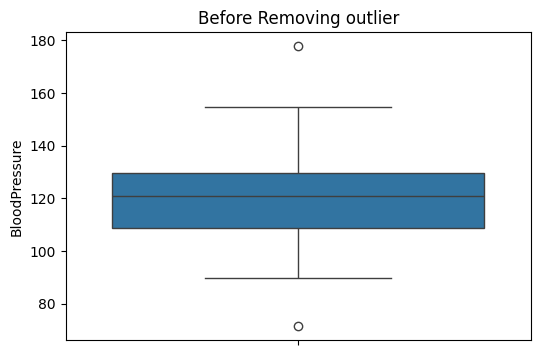

In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df["BloodPressure"])
plt.title("Before Removing outlier")
plt.show()

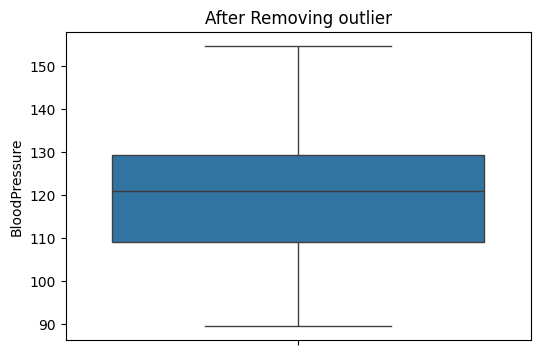

In [26]:
# Removing outliers with IQR method
df.sort_values(by="BloodPressure", inplace=True)
Q1, Q3 = df["BloodPressure"].quantile([0.25, 0.75])


IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

clean_df = df[
    (df["BloodPressure"] >= lower_bound) & (df["BloodPressure"] <= upper_bound)
]


plt.figure(figsize=(6, 4))
sns.boxplot(data=clean_df["BloodPressure"])
plt.title("After Removing outlier")
plt.show()

Q2: Hypothesis Testing (2 Marks)
Perform the following:
 - Is the mean 'CholesterolLevel' significantly different from 195 mg/dL having a sample
size of 20?
 - Is there a relationship between 'Gender' and 'RiskCategory'?
For both tests, include:
- Null and alternative hypotheses
- Test statistics and p-values
- Your interpretation (reject/fail to reject H₀)

In [27]:
# Null hypothesis (Ho):

# The sample mean = 195 mg/dL
# Ho µ = 195 mg/dL

# Alternate hypothesis (Hi);
# The sample mean != 195 mg/dL
# Hi µ != 195 mg/dL

# This is a two tail test
# Since the sample size is less than 30 and population mean is likely unkown, we will use a one sample t-test

sample_size = 20
population_mean = 195
alpha = 0.05
dof = sample_size - 1



cholesterol_df = df[['CholesterolLevel']].copy()

sample = cholesterol_df.iloc[0:sample_size].copy()

t_stat, p_value = stats.ttest_1samp(sample, popmean=population_mean)

# With p value
if p_value < alpha:
    print("We Reject the null hypothesis mean is significantly differnet from 195 mg/dL.")
else:
    print("Mean is not significantly differnet from 195 mg/dL. (Fail to reject null hypothes H0)")

# With t_critical
# t_critical = stats.t.ppf(1 - alpha/2, dof)

# if  t_stat < -t_critical or t_stat> t_critical :
#     print("We Reject the null hypothesis mean is significantly differnet from 195 mg/dL.")
# else:
#     print("Mean is not significantly differnet from 195 mg/dL. (Fail to reject null hypothes H0)")





AttributeError: Module 'scipy' has no attribute 'ttest_1samp'

In [ ]:
# Null hypothesis gender and risk category are independent
# Altenate hypothesis gender and risk category are dependent

# Significance level
alpha = 0.05

crosstab = pd.crosstab(df['Gender'],df['RiskCategory'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(crosstab)

# # With p value
# if p_value < alpha:
#     print("Reject the null hypothesis, gender and risk category are dependent")
# else:
#     print("Gender and risk category are independent. (Fail to reject null hypothes H0)")

# Critical value from chi-square distribution
chi2_critical = stats.chi2.ppf(1 - alpha, dof)

# Output
print(f"\nChi2 Statistic: {chi2_stat:.4f}")
print(f"Chi2 Critical Value (alpha=0.05, dof={dof}): {chi2_critical:.4f}")

# Decision based on chi2 critical value
if chi2_stat > chi2_critical:
    print("✅ Reject the null hypothesis: Gender and Risk Category are dependent.")
else:
    print("❌ Fail to reject the null hypothesis: Gender and Risk Category are independent.")



Chi2 Statistic: 1.2770
Chi2 Critical Value (alpha=0.05, dof=2): 5.9915
❌ Fail to reject the null hypothesis: Gender and Risk Category are independent.


Q3: Modeling with First Order ODE (2 Marks)
Model the concentration of a drug in a patient’s bloodstream using the equation:
 dC/dt = k(D - C)
Where:
- k = 0.05, D = 120, and initial condition C(0) = 0
- Simulate from t = 0 to t = 100
- Plot the result and explain the physical meaning of the concentration curve over time.

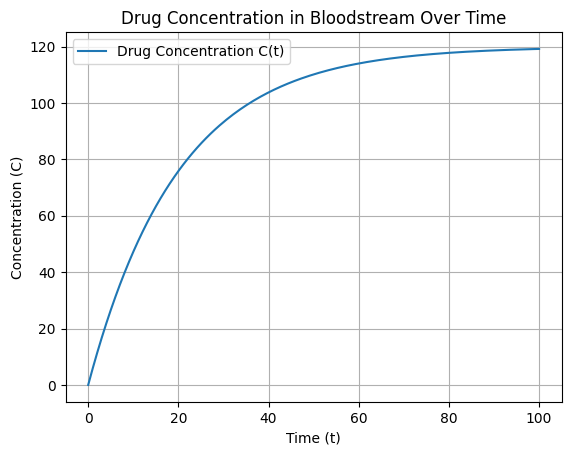

In [30]:
from scipy.integrate import odeint
K = 0.05
D = 120

def model(C, t):
    dCdt =  K * (D-C)
    return dCdt

C0 = 0

# Time points 
t = np.linspace(0, 100, 200)

C = odeint(model, C0,t)

plt.plot(t, C, label='Drug Concentration C(t)')
plt.xlabel('Time (t)')
plt.ylabel('Concentration (C)')
plt.title('Drug Concentration in Bloodstream Over Time')
plt.grid(True)
plt.legend()
plt.show()
# The concentration curve shows how a drug builds up in the bloodstream over time. It rises quickly at first when the blood has no drug, then slows down as it approaches the maximum level (120 mg). This reflects how the body absorbs the drug fast initially, then levels off as it becomes saturated.